In [1]:
import numpy as np
from models import ADAM
import datasets.read as data
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")

/home/klimek/sem8_v2/aml/aml_projects/Project1/datasets/read.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace('Osmancik', 0)


In [3]:
X.shape

(3810, 7)

In [4]:
np.isnan(X).sum()

0

In [5]:
X[:5,:]

array([[1.52310000e+04, 5.25578979e+02, 2.29749878e+02, 8.50937881e+01,
        9.28882003e-01, 1.56170000e+04, 5.72895527e-01],
       [1.46560000e+04, 4.94311005e+02, 2.06020065e+02, 9.17309723e+01,
        8.95404994e-01, 1.50720000e+04, 6.15436316e-01],
       [1.46340000e+04, 5.01122009e+02, 2.14106781e+02, 8.77682877e+01,
        9.12118077e-01, 1.49540000e+04, 6.93258822e-01],
       [1.31760000e+04, 4.58342987e+02, 1.93337387e+02, 8.74483948e+01,
        8.91860902e-01, 1.33680000e+04, 6.40669048e-01],
       [1.46880000e+04, 5.07166992e+02, 2.11743378e+02, 8.93124542e+01,
        9.06690896e-01, 1.52620000e+04, 6.46023929e-01]])

In [6]:
y.shape

(3810,)

In [7]:
np.isnan(y).sum()

0

In [8]:
y[:5]

array([1, 1, 1, 1, 1])

## ADAM test

In [9]:
m = ADAM(iter_limit=500)
m.fit(X, y, interactions=[(0, 6)])
m.get_params()['coefficients']

Debug: 0.3511005323365522
Debug: 0.28368721965069366
Debug: 0.27345655543969993
Debug: 0.26314948470780664
Debug: 0.2597654425261329
Debug: 0.26583534593894775
Debug: 0.27568820989068143
Debug: 0.26270089557457155
Debug: 0.26569327859394676
Debug: 0.2659510495315871
Debug: 0.26299499498255585
Debug: 0.26473438445664854
Debug: 0.2460101937763497
Debug: 0.2690311378669463
Debug: 0.2729670369595283
Debug: 0.25632948376657083
Debug: 0.265727767300433
Debug: 0.26850894920900714
Debug: 0.2606446490735692
Debug: 0.26485805473623003
Debug: 0.2434706183969979
Debug: 0.25914260527464705
Debug: 0.2556480291225043
Debug: 0.26629635165076593
Debug: 0.2598049165757317
Debug: 0.25122680647264417
Debug: 0.25210187801955897
Debug: 0.2732712461160389
Debug: 0.26801290891825147
Debug: 0.26505330338896727
Debug: 0.2533559132550067
Debug: 0.2592032061166094
Debug: 0.27617404907657317
Debug: 0.2632711311642879
Debug: 0.24950550876802424
Debug: 0.25796117927930595
Debug: 0.26585630511804936
Debug: 0.25432901

array([-131.23591098,    0.74176932,  -43.50655857,  -19.57357893,
       -111.69306883, -106.49098107,    2.2754899 , -132.31600276,
         -0.70020024])

<Axes: title={'center': 'Class = 1'}, ylabel='Count'>

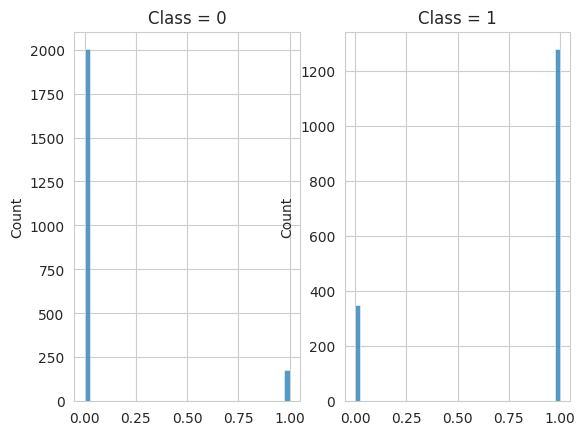

In [10]:
y0 = y==0
y1 = y==1

p0 = m.predict_proba(X[y0])
p1 = m.predict_proba(X[y1])

fig, ax = plt.subplots(1, 2)
ax[0].set_title('Class = 0')
sns.histplot(x=p0, ax=ax[0], binwidth=0.025)
ax[1].set_title('Class = 1')
sns.histplot(x=p1, ax=ax[1], binwidth=0.025)

In [11]:
y_pred = m.predict(X)
1 - np.abs(y_pred - y).mean()

0.8616797900262467

array([-131.23591098,    0.74176932,  -43.50655857,  -19.57357893,
       -111.69306883, -106.49098107,    2.2754899 , -132.31600276,
         -0.70020024])

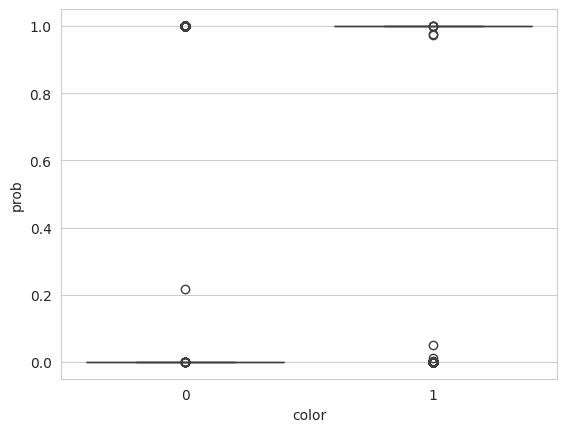

In [12]:
yyy = m.predict_proba(X)
df = pd.DataFrame.from_dict({'prob': yyy, 'color': y})
sns.boxplot(data=df, x='color', y='prob')

(yyy[y1] > 0.99).mean()
perfect_coefs = m.get_params()['coefficients']
perfect_coefs

In [13]:
np.all(m.get_params()['weights'] == np.diag(np.ones(X.shape[0])))

KeyError: 'weights'

In [ ]:
m.get_params()